<a href="https://colab.research.google.com/github/ghoshal7/python_basics/blob/master/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

got to - https://www.youtube.com/watch?v=yX8KuPZCAMo

In [61]:
import numpy as np
import tensorflow as tf
tf.__version__

'1.12.0'

# Constants

In [62]:
# define a constant
a = tf.constant(3, name = 'a')
b = tf.constant(5, name = 'b')

c = tf.multiply(a,b)

print(c)

Tensor("Mul_15:0", shape=(), dtype=int32)


Writing and running programs in TensorFlow has the following steps:

1.   Create Tensors (variables) that are not yet executed/evaluated.
2.   Write operations between those Tensors.
3.   Initialize your Tensors.
4.   Create a Session.
5.   Run the Session. This will run the operations you'd written above.

**To evaluate, we have to run *session* ** 





In [63]:
sess = tf.Session()
print(sess.run(c))
sess.close()

15


Alternatively, *with session*:

In [64]:
with tf.Session() as session:
  session.run(init)
  print(session.run(c)) # no need to close the session

15


**create a session and run the operations inside the session**

# Placeholders



*   A placeholder is an object whose value you can specify only later
*   To specify values for a placeholder, you can pass in values by using a "feed dictionary"



In [65]:
p = tf.placeholder(tf.int64, name = 'p')
sess = tf.Session()
print(sess.run(2 * p, feed_dict = {p: 3}))
sess.close()

a = tf.placeholder(tf.int64)
b = tf.placeholder(tf.int64)
sess = tf.Session()
print(sess.run(a+b, feed_dict = {a: [1,2], b:[3,4]}))
sess.close()

6
[4 6]


# Variables

**remember to initialize your variables**

In [66]:
w = tf.Variable([5.], tf.float32)
b = tf.Variable([10.], tf.float32)
x = tf.placeholder(tf.float32)

y_hat = w*x+b

init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  print(sess.run(y_hat,{x:[1.0,2.0,3.0,4.0]}))
  

[15. 20. 25. 30.]


**Calculate loss of linear models**

In [67]:
w = tf.Variable([5.], tf.float32)
b = tf.Variable([10.], tf.float32)

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

y_hat = w*x+b

sq_loss = tf.square(y-y_hat)
loss = tf.reduce_sum(sq_loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  print(sess.run(loss, {x:[1.,2.,3.,4.], y:[0.,-1.,-2.,-3.]}))
  print(sess.run([w,b]))

2484.0
[array([5.], dtype=float32), array([10.], dtype=float32)]


**Implement gradient descent**

In [68]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

with tf.Session() as sess:
  sess.run(init)
  for i in range(1000):
    sess.run(train, {x:[1.,2.,3.,4.], y:[0.,-1.,-2.,-3.]})
  
  print(sess.run([w,b]))

[array([-1.0000125], dtype=float32), array([1.0000368], dtype=float32)]


# Functions

In [69]:
# y = ax+b
def linear_func():
  np.random.seed(1)
  
  # define it
  x = np.random.randn(3, 1)
  a = np.random.randn(4, 3)
  b = np.random.randn(4, 1)
  y = tf.add(tf.matmul(a,x), b)
  
  # run session
  sess = tf.Session()
  result = sess.run(y)
  sess.close()
  
  return result

linear_func()

array([[-2.15657382],
       [ 2.95891446],
       [-1.08926781],
       [-0.84538042]])

## Built-in functions - Deeplearning.ai

In [70]:
def sigmoid(z):
  
  x = tf.placeholder(tf.float32, name="x")
  sigm_x = tf.sigmoid(x)
  
  sess = tf.Session()
  result = sess.run(sigm_x, feed_dict = {x:z})
  sess.close()
  
  return result

print(sigmoid(2))
print(sigmoid([[1,2],[3,4]]))

0.880797
[[0.7310586  0.880797  ]
 [0.95257413 0.98201376]]


In [71]:
def log_like_cost(logits, labels):
  
  z = tf.placeholder(tf.float32, name="z")
  y = tf.placeholder(tf.float32, name="y")
  
  cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)  # -(y*log(sig(z))+(1-y)*log(1-sig(z)))
  
  sess = tf.Session()
  cost = sess.run(cost, feed_dict={z: logits, y: labels})
  sess.close()
  
  return cost

logits = sigmoid(np.array([0.2, 0.4, 0.7, 0.9]))
cost = log_like_cost(logits, np.array([0, 0, 1, 1]))
print ("cost = " + str(cost))

cost = [1.0053872  1.0366409  0.4138543  0.39956614]


In [72]:
def one_hot_matrix(labels, C):
  
  C = tf.constant(C, name='C')
  one_hot_matrix = tf.one_hot(indices=labels, depth=C, axis=0)
  
  sess = tf.Session()
  one_hot = sess.run(one_hot_matrix)
  sess.close()
    
  return one_hot

labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C=4)
print (str(one_hot))

[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [73]:
def ones(shape):
  ones = tf.ones(shape)  # tf.zeros() for 0's
  sess = tf.Session()
  ones = sess.run(ones)
  sess.close()
    
  return ones

print('vector = '+str(ones(3)))
print('matrix = ', '\n', str(ones([3,3])))

vector = [1. 1. 1.]
matrix =  
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


# Neural Network models



**1.   With TensorFlow**



In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

** MNIST - Fashion mnist**

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

Shape of training images =  (60000, 28, 28)
length of training label =  60000
Shape of testing images =  (10000, 28, 28)
length of testing label =  10000


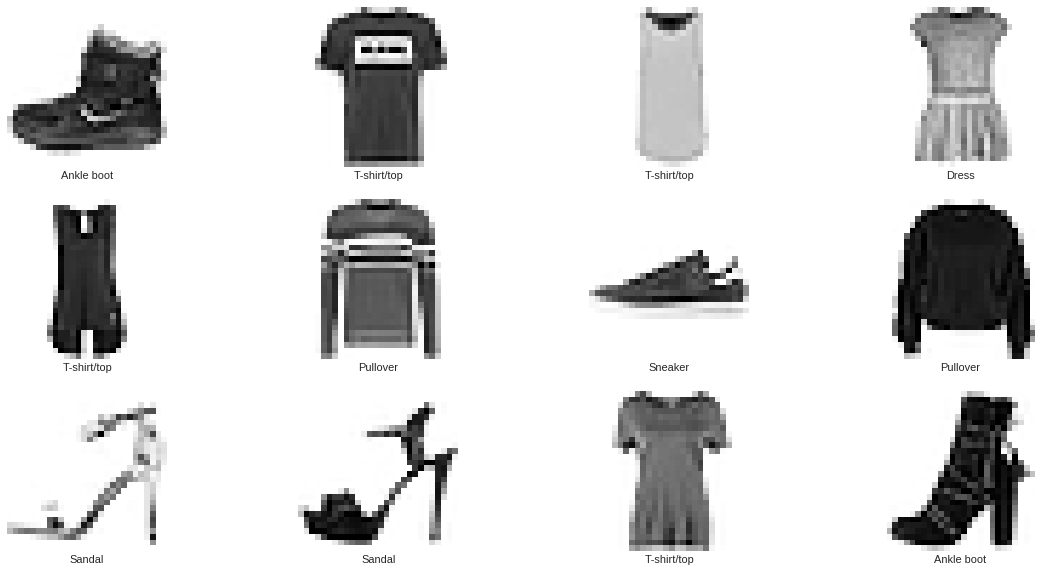

In [86]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('Shape of training images = ', train_images.shape)
print('length of training label = ', len(train_labels))

print('Shape of testing images = ', test_images.shape)
print('length of testing label = ', len(test_labels))


# visualize the data
plt.figure(figsize = (20,10))
for i in range(12):
  plt.subplot(3,4, i+1)
  plt.xticks([]) ; plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])

In [0]:
# normalizing the data

train_images = train_images/255
test_images = test_images/255

# create one-hot encoding for the labels
def one_hot_encode(labels):
  number_of_labels = len(labels)
  number_of_unique_labels = len(np.unique(labels))
  one_hot_matrix = np.zeros((number_of_labels, number_of_unique_labels))
  one_hot_matrix[np.arange(number_of_labels), np.array([labels])] = 1
  return one_hot_matrix

y_train_one_hot = one_hot_encode(train_labels)
y_test = one_hot_encode(test_labels)


from sklearn.cross_validation import train_test_split

# test_index = np.random.randint(train_images.shape[0], size=int(0.2*train_images.shape[0]))
# train_index = [i for i in np.arange(train_images.shape[0]) if i not in test_index]
# x_train = train_images[train_index]; x_test = train_images[tes_index]
# y_train = y_train[train_index]; y_test = y_test[test_index]

x_train, x_test, y_train, y_test = train_test_split(train_images,y_train_one_hot, test_size = 0.2, random_state = 42)

In [0]:
learning_rate = 0.01
epochs = 1000

n_dim = np.ndim(train_images)

n_class = len(np.unique(train_labels))

n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

x = tf.placeholder(tf.float32, [None, n_dim]) # number of row = number of observation, can vary; number of column for x is the dimension
w = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y = tf.placeholder(tf.float32, [None, n_class])

def multilayer_perceptron(x, weights, biases):
  layer_1 = tf.add(tf.matmul(x,weights['w1']), biases['b1'])
  layer_1 = tf.nn.relu(layer_1)
  
  layer_2 = tf.add(tf.matmul(weights['w2'], layer_1), biases['b2'])
  layer_2 = tf.nn.sigmoid(layer_2)
  
  layer_3 = tf.add(tf.matmul(weights['w3'], layer_2), biases['b3'])
  layer_3 = tf.nn.sigmoid(layer_2)
  
  layer_4 = tf.add(tf.matmul(weights['w4'], layer_3), biases['b4'])
  layer_4 = tf.nn.sigmoid(layer_4)
  
  out = tf.add(tf.matmul(layer_4, weights['out']), biases['out'])
  
  return out

weights = {'w1' : tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
           'w2' : tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
           'w3' : tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
           'w4' : tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
           'out' : tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))}

biases = {'b1' : tf.Variable(tf.truncated_normal([n_hidden_1])),
          'b2' : tf.Variable(tf.truncated_normal([n_hidden_2])),
          'b3' : tf.Variable(tf.truncated_normal([n_hidden_3])),
          'b4' : tf.Variable(tf.truncated_normal([n_hidden_4])),
          'out' : tf.Variable(tf.truncated_normal([n_class]))
         }

init = tf.global_variables_initializer()

y_hat = multilayer_perceptron(x,weights,biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_hat, labels = y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [141]:
sess = tf.Session()
sess.run(init)

mse_hist = []
accuracy_hist = []
cost_hist = []

for e in range(epochs):
  sess.run(training_step, feed_dict = {x:x_train, y: y_train})
  cost = sess.run(cost, feed_dict = {x:x_train, y: y_train})
  cost_hist.append(cost)
  correct_prediction  = tf.equal(tf.argmax(y_hat,1), tf.argmax(y,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  pred_y = sess.run(y, feed_dict = {x:test_x})
  mse = tf.reduce_mean(tf.square(pred_y-test_y))
  mse_ = sess.run(mse)
  mse_history.append(mse_)
  accuracy_ = sess.run(accuracy, feed_dict = {x:train_x, y:train_y})
  accuracy_hist.append(accuracy_)
  

ValueError: ignored